## Model Building and Evaluation

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

#styles for matplotlib
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }


In [2]:
df = pd.read_csv("train.csv")

display(df.head())
display(df.info())
display(df.describe())
display(round(df.isnull().sum()/len(df.index) * 100,2))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

## Removing NA's

In [133]:
# removing features having high NA's
df = df.drop(["PoolQC","Fence","MiscFeature","Alley"],axis=1)

# Filling NA with no garage (according to data dictionary)
NoGarageColumns = ["GarageType","GarageFinish","GarageQual","GarageCond"]
for i in NoGarageColumns:
    df[i] =  df[i].fillna('No_Garage')
df["GarageYrBlt"].fillna(0,inplace=True)

# Filling NA with no basement (according to data dictionary)
NoBasementColumns = ['BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond']
for i in NoBasementColumns :
    df[i] =  df[i].fillna('No_Basement')

# Filling NA with No Fireplace (according to data dictionary)
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')


In [134]:
#checking distribution of LotFrontage and imputing
df["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [135]:
#imputing median in LotFrontage
median = df['LotFrontage'].median()
df["LotFrontage"] = df["LotFrontage"].fillna(median)

In [136]:
df = df.dropna()

In [137]:
# converting types
df.MSSubClass = df.MSSubClass.astype(object)
df.Id = df.Id.astype(object)

# Label encoding 
df.CentralAir = pd.to_numeric(df.CentralAir.map({"Y":1,"N":0}))

df.GarageYrBlt = pd.to_numeric(df.GarageYrBlt)
df.SalePrice = df.SalePrice.astype("float64")

# transforming the year sales to remove skwewness
df["SalePrice"] = np.log(df["SalePrice"])
minmax = MinMaxScaler()
df["SalePrice"] = minmax.fit_transform(df["SalePrice"].values.reshape(-1, 1))

In [138]:
# Finding how many numerical and categorical features

num_var = list(df.loc[:,df.dtypes != np.object].columns)
cat_var = list(df.loc[:,df.dtypes == np.object].columns)
print(len(cat_var)," ",len(num_var))

40   37


## EDA and feature filtering

37

<Figure size 1152x1152 with 0 Axes>

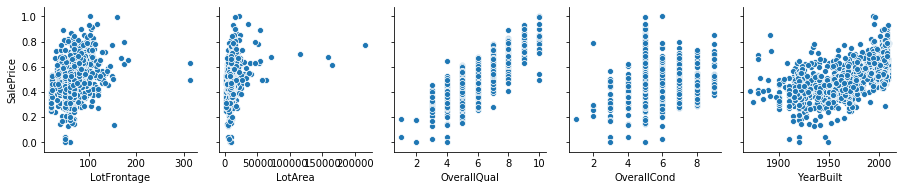

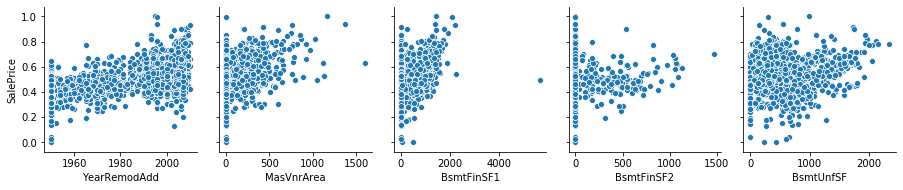

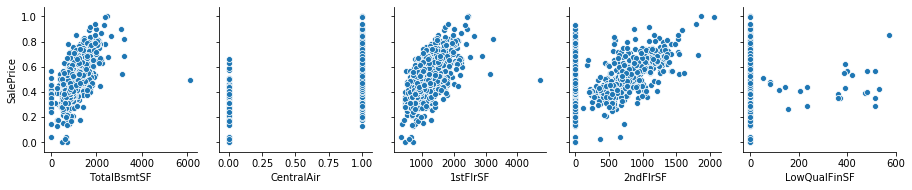

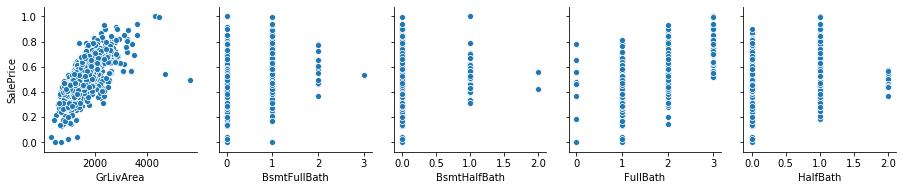

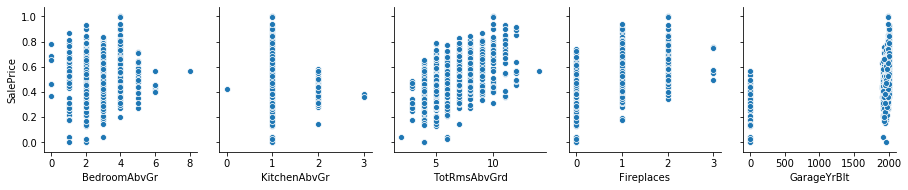

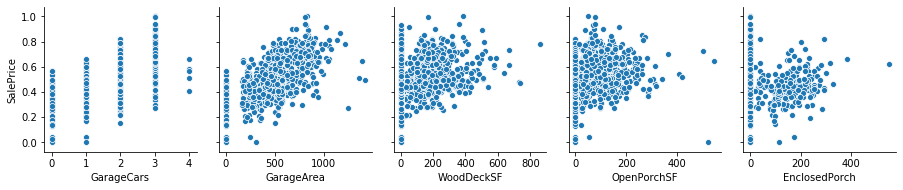

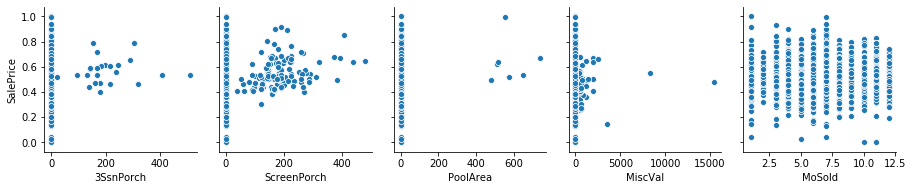

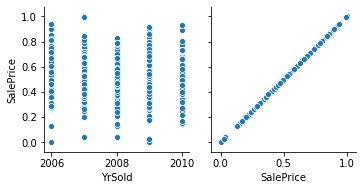

In [139]:
#plotting numeric data to find any pattern

numericalDf = df[num_var]
display(len(numericalDf.columns))
plt.figure(figsize=(16, 16))
sns.pairplot(numericalDf,y_vars=["SalePrice"],x_vars=num_var[0:5])
sns.pairplot(numericalDf,y_vars=["SalePrice"],x_vars=num_var[5:10])
sns.pairplot(numericalDf,y_vars=["SalePrice"],x_vars=num_var[10:15])
sns.pairplot(numericalDf,y_vars=["SalePrice"],x_vars=num_var[15:20])
sns.pairplot(numericalDf,y_vars=["SalePrice"],x_vars=num_var[20:25])
sns.pairplot(numericalDf,y_vars=["SalePrice"],x_vars=num_var[25:30])
sns.pairplot(numericalDf,y_vars=["SalePrice"],x_vars=num_var[30:35])
sns.pairplot(numericalDf,y_vars=["SalePrice"],x_vars=num_var[35:40])

plt.show()


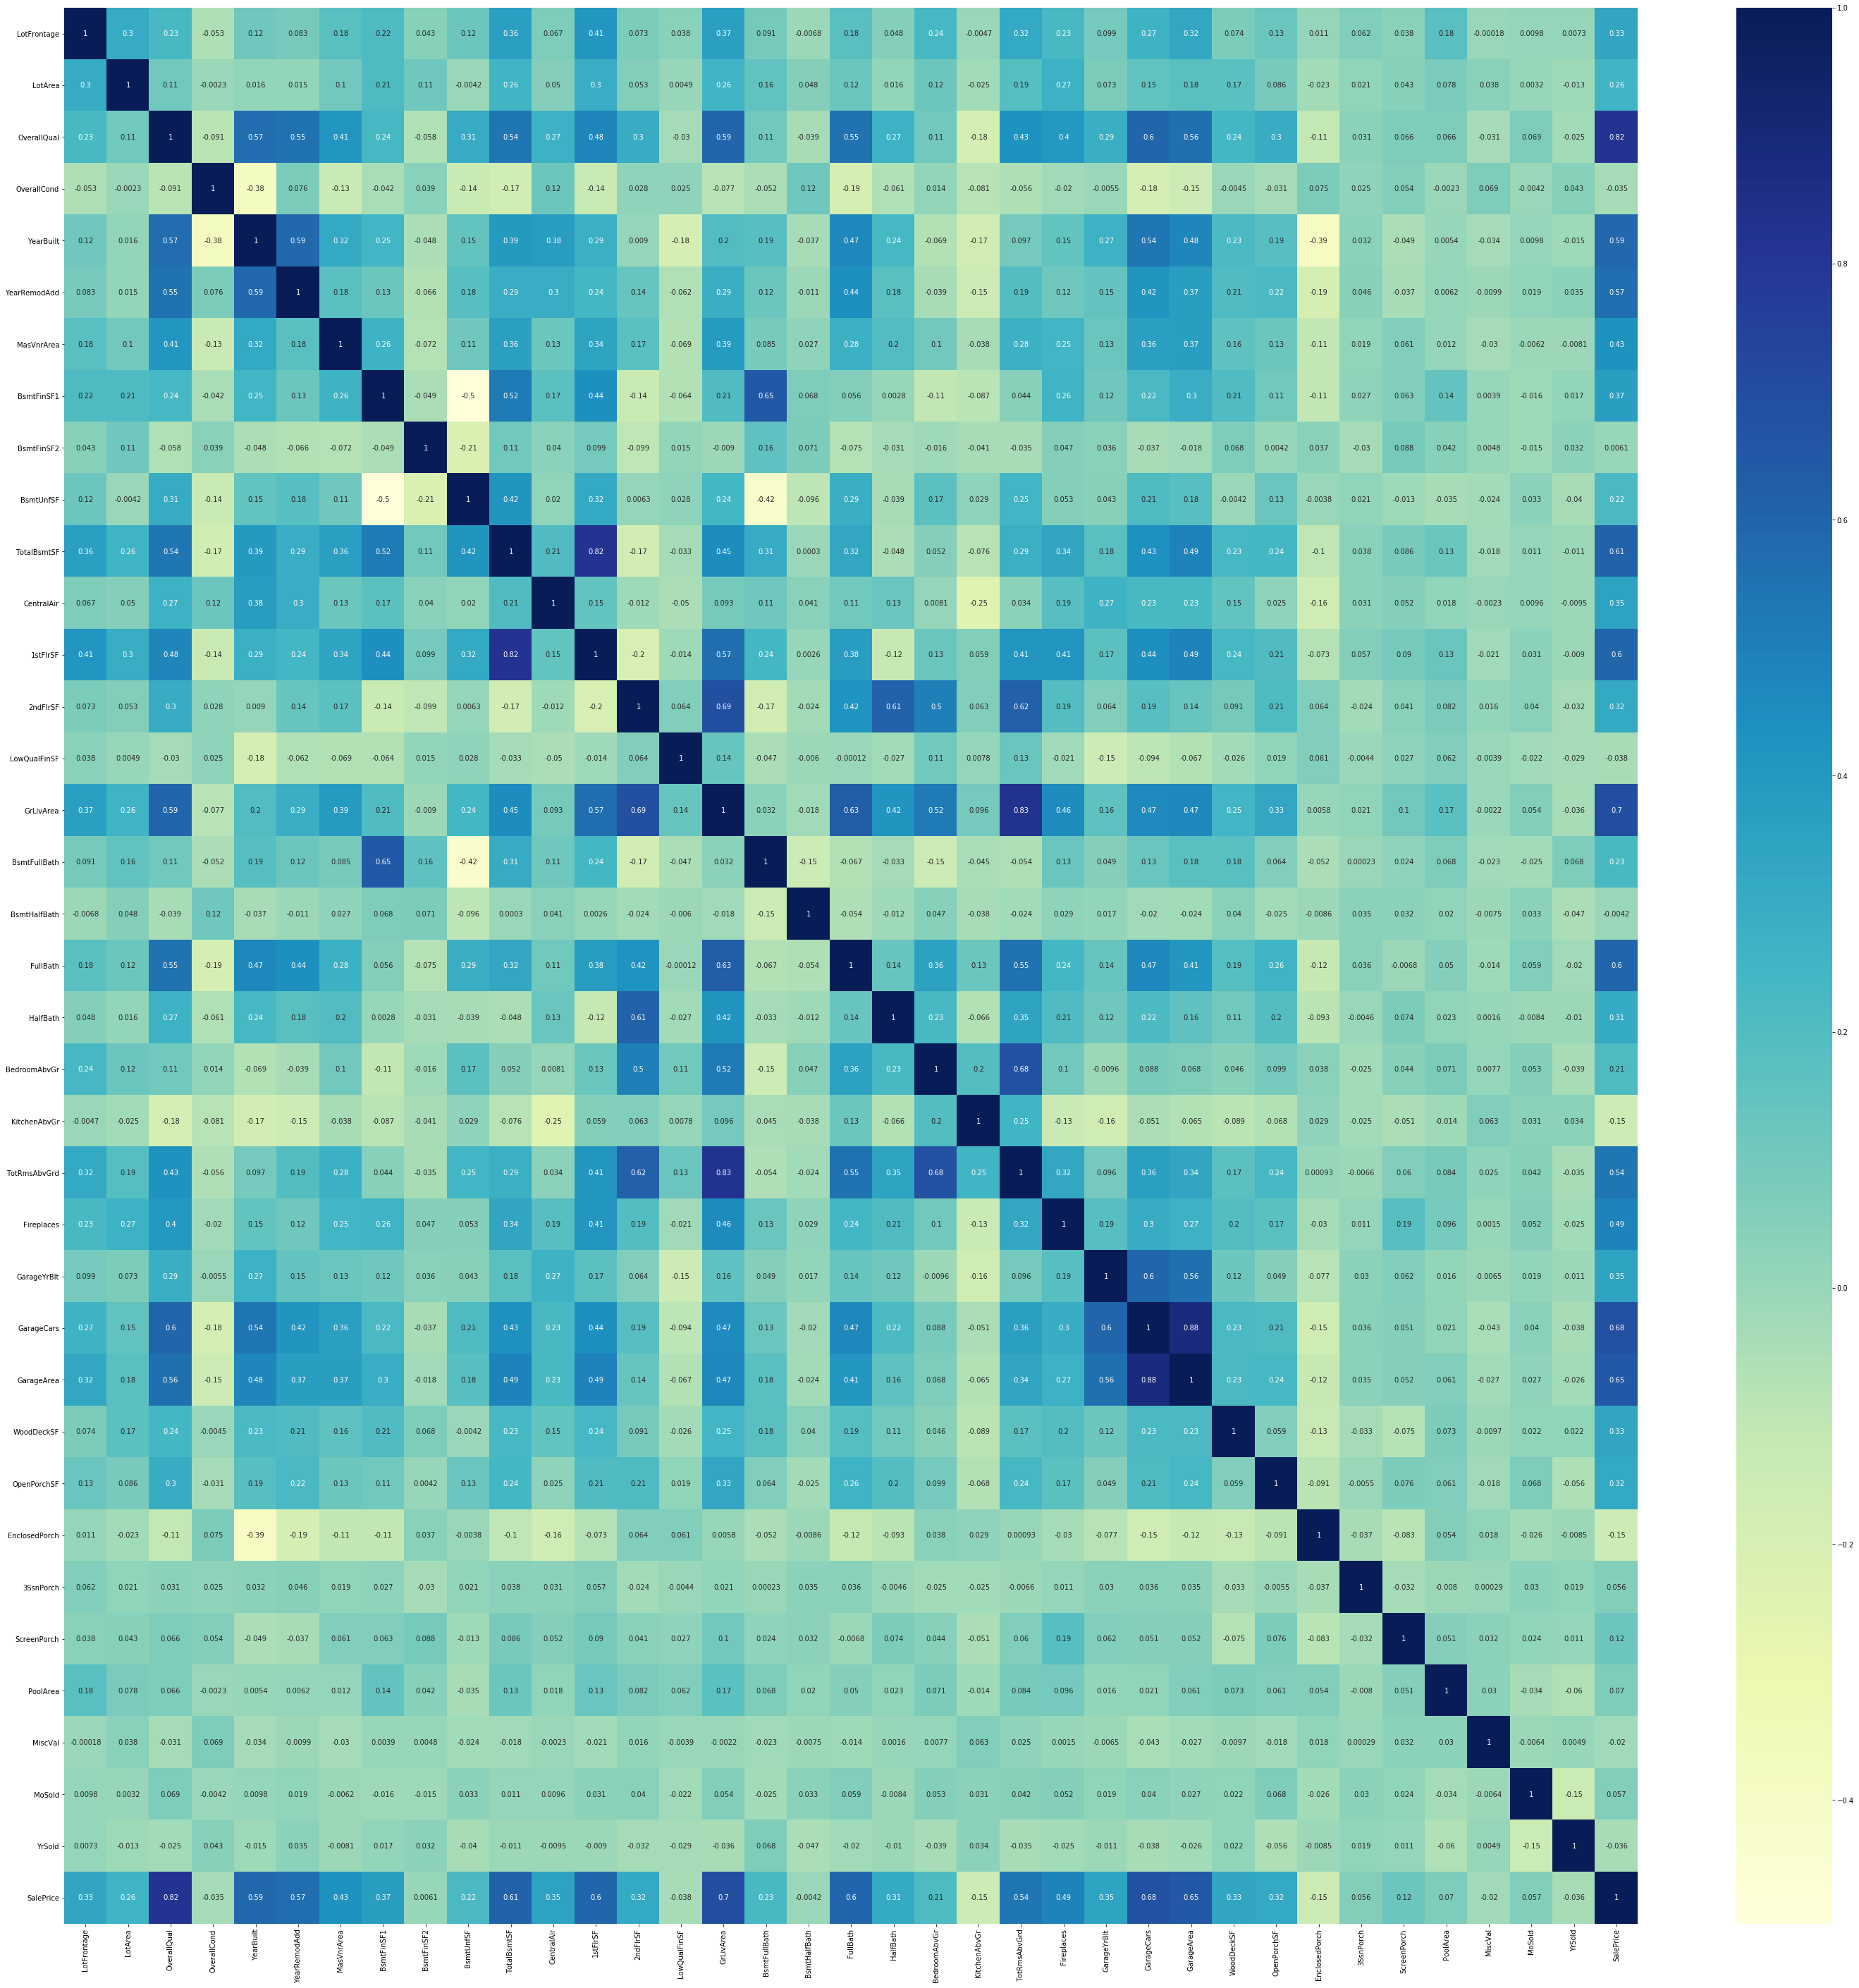

In [140]:
# Checking correlation
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

In [141]:
# Dropping Features that are highly correlated
cor = df.corr().abs()
upper_triangle = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
highCorrelatedFeatures = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
highCorrelatedFeatures.remove("SalePrice")
df = df.drop(highCorrelatedFeatures,axis=1)
for i in highCorrelatedFeatures:
    num_var.remove(i)

In [142]:
# recalculating numerical and categorical variable list
df = df.reset_index()
num_var = list(df.loc[:,df.dtypes != np.object].columns)
cat_var = list(df.loc[:,df.dtypes == np.object].columns)

In [143]:
# removing id
df.drop(["Id"],axis=1)
cat_var.remove("Id")

# creating dummy encoding
df_dummy = pd.get_dummies(df[cat_var], drop_first=True)
masterDf = pd.concat([df, df_dummy], axis=1)
masterDf = masterDf.drop(cat_var,axis=1)

In [144]:
masterDf.head()

,index,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,...,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No_Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No_Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,1,854,0,1710,1,0,2,1,3,1,0,2003.0,2,0,61,0,0,0,0,0,2,2008,0.581431,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,2,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1,0,0,1262,0,1,2,0,3,1,1,1976.0,2,298,0,0,0,0,0,0,5,2007,0.536319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,2,3,68.0,11250,7,5,2001,2002,162.

In [145]:
# separating X and y
y = masterDf.pop("SalePrice")
X = masterDf
X = X.drop(["Id"],axis=1)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [147]:
# Scaling variables
scaler = StandardScaler();
num_var.remove("SalePrice")
X_train[num_var]= scaler.fit_transform(X_train[num_var]) # fit transform for train data
X_test[num_var] = scaler.transform(X_test[num_var]) # transfrom for test data

### 1. Ridge Regression

In [148]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,11,12,13,14,15,20,30,40,50,60 ,70 ]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        n_jobs=4,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()


Fitting 5 folds for each of 34 candidates, totalling 170 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 170 out of 170 | elapsed:    2.7s finished


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024801,0.006145,0.0052,0.005036,0.0001,{'alpha': 0.0001},-0.036330,-0.029073,-0.036166,-0.036308,-0.028822,-0.033340,0.003588,34,-0.017655,-0.018918,-0.017786,-0.018536,-0.018498,-0.018279,0.000480
1,0.014601,0.000490,0.0018,0.000400,0.001,{'alpha': 0.001},-0.036332,-0.029062,-0.036080,-0.036123,-0.028729,-0.033265,0.003570,33,-0.017658,-0.018925,-0.017791,-0.018545,-0.018512,-0.018286,0.000483
2,0.012401,0.001020,0.0022,0.000400,0.01,{'alpha': 0.01},-0.036331,-0.029184,-0.035428,-0.034836,-0.028066,-0.032769,0.003435,32,-0.017687,-0.019080,-0.017901,-0.018669,-0.018745,-0.018416,0.000531
3,0.013401,0.000800,0.0022,0.000400,0.05,{'alpha': 0.05},-0.036239,-0.029683,-0.034009,-0.032630,-0.028042,-0.032120,0.002945,31,-0.017822,-0.019973,-0.018736,-0.019566,-0.019873,-0.019194,0.000812
4,0.012601,0.000490,0.0022,0.000748,0.1,{'alpha': 0.1},-0.036128,-0.030133,-0.033285,-0.031668,-0.028321,-0.031907,0.002675,30,-0.017951,-0.020681,-0.019485,-0.020283,-0.020677,-0.019815,0.001029


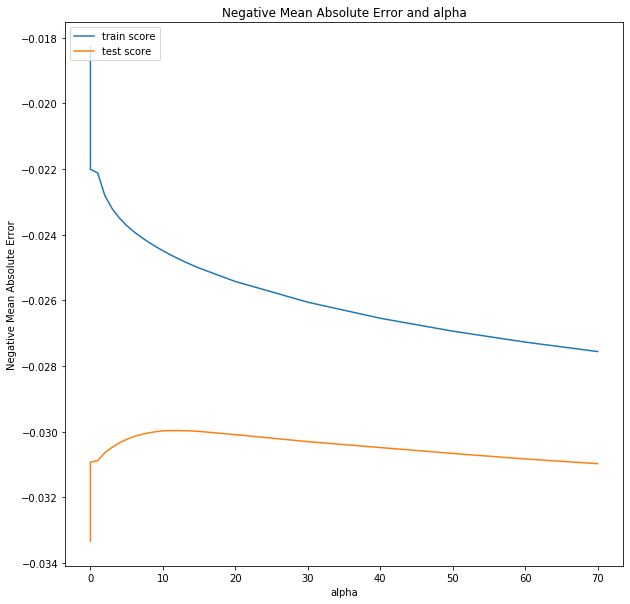

In [149]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.figure(figsize=(10,10))
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [150]:
# reason -  at alpha =  10, the curve starts to flatten
alpha_r =  10
ridge1 = Ridge(alpha = alpha_r)

In [151]:
# RFE

rfe = RFE(ridge1,40)
rfe.fit(X_train,y_train)
selected_col = X_train.columns[rfe.support_]
display(selected_col)

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'GarageCars',
       'MSSubClass_30', 'MSSubClass_160', 'MSZoning_FV', 'MSZoning_RL',
       'LotShape_IR3', 'LandContour_Low', 'LotConfig_CulDSac',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition2_Norm', 'Condition2_PosN',
       'BldgType_Twnhs', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace',
       'Exterior2nd_Stucco', 'Foundation_PConc', 'BsmtQual_No_Basement',
       'BsmtExposure_Gd', 'BsmtExposure_No_Basement',
       'BsmtFinType1_No_Basement', 'BsmtFinType1_Unf', 'Heating_Grav',
       'HeatingQC_Fa', 'FireplaceQu_No Fireplace', 'FireplaceQu_Po',
       'SaleType_New', 'SaleCondition_Normal'],
      dtype='object')

In [152]:
X_train_sel = X_train[selected_col]
ridge1.fit(X_train_sel,y_train)
display(ridge1.score(X_train_sel,y_train))
r_train = ridge1.score(X_train_sel,y_train)

0.8905026959776127

In [153]:
pd.DataFrame({"Feature":X_train_sel.columns.tolist(),"Coefficients":ridge1.coef_}).sort_values(["Coefficients"],ascending=False)

,Feature,Coefficients
3,GrLivArea,0.044191
18,Neighborhood_NridgHt,0.038213
0,OverallQual,0.033643
14,Neighborhood_Crawfor,0.030312
38,SaleType_New,0.029432
26,Exterior1st_BrkFace,0.028741
8,MSZoning_RL,0.028339
30,BsmtExposure_Gd,0.025774
20,Neighborhood_StoneBr,0.024293
22,Condition2_Norm,0.023186


### Residual Analysis

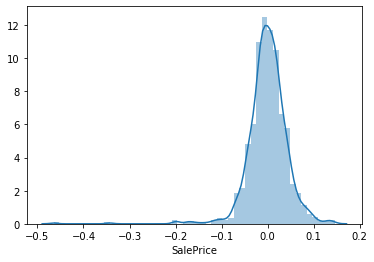

In [154]:
y_train_pred = ridge1.predict(X_train_sel)
res = y_train - y_train_pred
sns.distplot(res)

### Model Evaluation on testing data

In [155]:
# Diffecence between test and train r2 is ~ 3%
X_test_sel = X_test[X_train_sel.columns]
y_test_pred = ridge1.predict(X_test_sel)
r_test =  r2_score(y_true=y_test,y_pred=y_test_pred)

### 1. Lasso Regression

In [156]:
params = {'alpha': [0.00011,0.00012,0.00013,0.00014,0.00015,0.00016,0.00017,0.00018
                    ,0.00019,0.00020,0.00030,0.00040,0.00050,0.00060,0.00070]}

lasso = Lasso(selection="random")
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1,n_jobs=4)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  68 out of  75 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='random', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'alpha': [0.00011, 0.00012, 0.00013, 0.00014, 0.00015,
                                   0.00016, 0.00017, 0.00018, 0.00019, 0.0002,
                                   0.0003, 0.0004, 0.0005, 0.0006, 0.0007]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [157]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.220013,0.190365,0.0020,9.536743e-08,0.00011,{'alpha': 0.00011},-0.034008,-0.028218,-0.029699,-0.028560,-0.027579,-0.029613,0.002303,10,-0.020704,-0.024177,-0.023534,-0.024046,-0.024357,-0.023364,0.001358
1,0.094605,0.016670,0.0030,6.324097e-04,0.00012,{'alpha': 0.00012},-0.033989,-0.028207,-0.029609,-0.028530,-0.027600,-0.029587,0.002296,9,-0.020894,-0.024301,-0.023719,-0.024202,-0.024515,-0.023526,0.001342
2,0.086005,0.019101,0.0024,4.900960e-04,0.00013,{'alpha': 0.00013},-0.033967,-0.028159,-0.029521,-0.028516,-0.027573,-0.029547,0.002299,8,-0.021080,-0.024412,-0.023907,-0.024328,-0.024672,-0.023680,0.001323
3,0.085405,0.021631,0.0020,0.000000e+00,0.00014,{'alpha': 0.00014},-0.033927,-0.028135,-0.029460,-0.028505,-0.027538,-0.029513,0.002294,7,-0.021240,-0.024509,-0.024111,-0.024445,-0.024834,-0.023828,0.001314
4,0.072204,0.021629,0.0024,4.899208e-04,0.00015,{'alpha': 0.00015},-0.033899,-0.028110,-0.029422,-0.028481,-0.027653,-0.029513,0.002269,6,-0.021391,-0.024607,-0.024322,-0.024557,-0.024992,-0.023974,0.001309


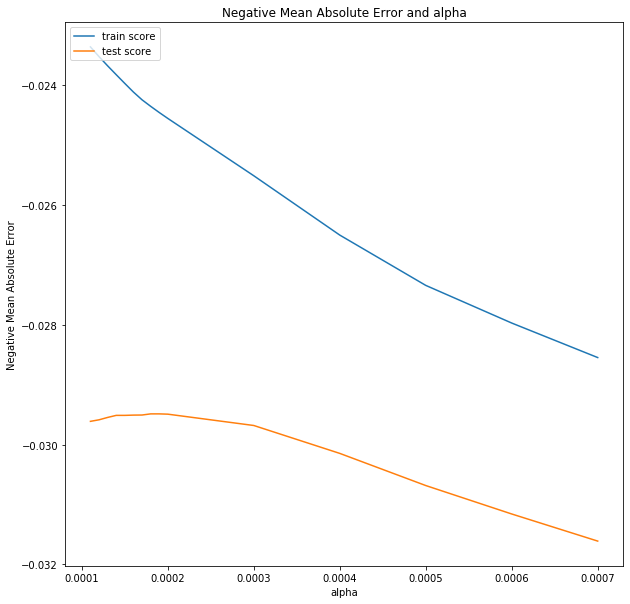

In [158]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(10,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [159]:
# reason -  at alpha =  0.00030, the curve starts to go down sharply
alpha_l =  0.00030
lasso1 = Lasso(alpha = alpha_l)

In [160]:
lasso1.fit(X_train,y_train)

Lasso(alpha=0.0003, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [161]:
features_l = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lasso1.coef_}).sort_values(["Coefficients"],ascending=False)
features_l

,Feature,Coefficients
15,GrLivArea,0.039655
81,Neighborhood_NridgHt,0.031990
71,Neighborhood_Crawfor,0.031303
3,OverallQual,0.030192
249,SaleType_New,0.024692
...,...,...
74,Neighborhood_IDOTRR,-0.013760
107,BldgType_Twnhs,-0.014587
34,MSSubClass_30,-0.023939
45,MSSubClass_160,-0.024902


In [162]:
display(lasso1.score(X_train,y_train))
l_train = lasso1.score(X_train,y_train)

0.907676439575846

### Residual Analysis

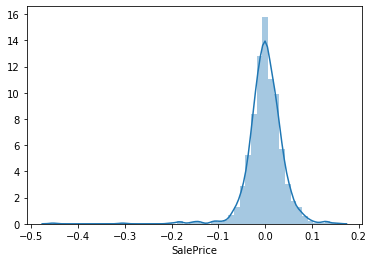

In [163]:
y_train_pred = lasso1.predict(X_train)
res = y_train - y_train_pred
sns.distplot(res)

### Model Evaluation

In [164]:
# Diffecence between test and train r2 is ~ 3%
y_test_pred = lasso1.predict(X_test)
l_test = r2_score(y_true=y_test,y_pred=y_test_pred)
l_test

0.8967631760345706

## Conclusion

In [165]:
print("R2 Score Ridge :")
print("alpha :",alpha_r)
print("Train",round(r_train,3))
print("Test",round(r_test,3))
print("R2 Score Lasso :")
print("alpha :",alpha_l)
print("Train",round(l_train,3))
print("Test",round(l_test,3))

R2 Score Ridge :
alpha : 10
Train 0.891
Test 0.887
R2 Score Lasso :
alpha : 0.0003
Train 0.908
Test 0.897


## Question 2

In [166]:
top5Feature =  list(features_l.iloc[0:5]["Feature"])

In [167]:
X_train_removed = X_train.drop(top5Feature,axis=1)
lasso2 = Lasso(alpha=0.003)
lasso2.fit(X_train_removed,y_train)

Lasso(alpha=0.003, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [168]:
lasso2.score(X_train_removed,y_train)

0.8194497485048788

In [169]:
features_l1 = pd.DataFrame({"Feature":X_train_removed.columns.tolist(),"Coefficients":lasso2.coef_}).sort_values(["Coefficients"],ascending=False)
features_l1

,Feature,Coefficients
10,TotalBsmtSF,0.031960
22,GarageCars,0.030587
12,2ndFlrSF,0.020147
20,Fireplaces,0.015951
16,FullBath,0.015841
...,...,...
112,RoofStyle_Gable,-0.001992
19,KitchenAbvGr,-0.002210
163,Foundation_CBlock,-0.002849
207,KitchenQual_TA,-0.009035
